## **Import Library**

Import semua library yang dibutuhkan untuk menganalisa dataset, dimana dalam Chatbot kali ini kami menggunakan metode Deep Learning, yaitu Neural Network. Selain itu kami juga menggunakan model Long Short Term Memory (LSTM) dalam pengolahan teks, Chatbot dll. Library yang kami gunakan yaitu NumPy untuk komputasi matematika, Matplotlib untuk visualisasi model data, Natural Language Toolkit atau NLTK untuk pengolahan teks, Pandas untuk membaca data, dan library lainnya.

In [ ]:
# Import Libraries
import json
import nltk
import time
import random
import string
import pickle
import numpy as np
import pandas as pd
from io import BytesIO
import tensorflow as tf
import IPython.display as ipd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D
from keras.layers import Dense, SimpleRNN
from keras.layers import Dense, GRU

## **Download NLTK Package**

Natural Language Toolkit (NLTK) adalah software open source python yang mendukung pengembangan NLP. Library NLTK merupakan tools NLP standar yang dikemabangkan untuk penelitian dan pendidikan.

In [ ]:
# Package sentence tokenizer
nltk.download('punkt')
# Package lemmatization
nltk.download('wordnet')
# Package multilingual wordnet data
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## **Load Dataset JSON**

Setelah import library, tahapan selanjutnya adalah me-load dataset yang telah disediakan. Dataset yang digunakan berupa format **.json** yang sangat cocok untuk membuat model Chatbot. 

Data Json merupakan data yang termasuk dalam *semi structured* yang dimana data ini menampung beberapa bagian data seperti **tag**, **pattern**, **context**, dan **response**. Pada proyek akhir ini kami membuat 2 jenis dataset yang kami buat manual menggunakan Visual Studio Code.


In [ ]:
# Importing the dataset
with open ('Project-Akhir/Dataset_Aghaskin.json') as content:
  data1 = json.load(content)
tags = []
inputs = []
responses = {}
words = []
classes = []
documents = []
ignore_words = ['?', '!']

for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # add to our classes list
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})

## **Menampilkan Dataset**

Dataset yang kami buat terdiri dari 1063 baris dan 2 kolom

In [ ]:
data

,patterns,tags
0,hallo,greeting
1,hai,greeting
2,halo,greeting
3,helo,greeting
4,hei,greeting
...,...,...
1058,apa obat jerawat,penjelasan_obat_jerawat
1059,obat untuk jerawat,penjelasan_obat_jerawat
1060,fungsi obat jerawat,penjelasan_obat_jerawat
1061,apa itu obat jerawat,penjelasan_obat_jerawat


## **Preprocessing Data**

Setelah kita meload data dan mengonversi data json menjadi dataframe. Tahapan selanjutnya adalah praproses pada dataset yang kita gunakan saat ini yaitu dengan cara:

1.   Remove Punctuations (Menghapus Punktuasi)
2.   Lematization (Lematisasi)
3.   Tokenization (Tokenisasi)
4.   Apply Padding (Padding)
5.   Encoding the Outputs (Konversi Keluaran Enkoding)

Kelima tahapan pemrosesan teks ini dijelaskan pada bagian langkah selanjutnya.

## **Remove Punctuations**

Tahapan praproses pada data teks yang pertama adalah menghapus punktuasi atau tanda baca seperti *special character* yaitu **'!'** (**tanda seru**) **','** (**tanda koma**) **'.'** (**tanda titik sebagai berhenti**) '**?**' (**tanda tanya**) dan tanda baca yang lain. Tahapan ini gunanya untuk mempermudah pemrosesan data teks yang akan kita olah.

In [ ]:
# Removing Punctuations (Menghilangkan Punktuasi)
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

## **Lemmatization**

Lemmatisasi atau Lemmatization adalah proses dimana merujuk pada melakukan sesuatu menggunakan vocabulary atau kosakata dan analisis morfologi kata-kata untuk menghilangkan *inflectional endings only* dan untuk mengembalikan bentuk *dictionary* (kata dalam kamus) dari sebuah kata yang dikenal sebagai ***lemma***. 

In [ ]:
# Lematisasi atau Lemmatization
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w.lower())for w in words if w not in ignore_words]
words = sorted(list(set(words)))

print (len(words), "unique lemmatized words", words)

268 unique lemmatized words [',', '1', '2', 'ada', 'adanya', 'aduh', 'afternoon', 'agar', 'aghaskin', 'aku', 'angkat', 'anjuran', 'apa', 'atau', 'aturan', 'bagaiamana', 'bagaimana', 'bagimana', 'bagus', 'bai', 'balm', 'banget', 'bantu', 'banyak', 'basic', 'bedanya', 'berapa', 'berjerawat', 'berkerut', 'berkomedo', 'bermasalah', 'berminyak', 'beruntusan', 'besar', 'bibir', 'bisa', 'bro', 'bruntusan', 'buat', 'bye', 'byee', 'cara', 'care', 'chemical', 'ciri', 'clay', 'cleansing', 'cream', 'creambuat', 'cuci', 'dadah', 'dah', 'dalam', 'dan', 'dari', 'dengan', 'di', 'dibat', 'dibuat', 'diciptakan', 'dihindari', 'dilakukan', 'dimaksud', 'dipakai', 'dong', 'double', 'dua', 'eksfoliasi', 'exfo', 'exfoliasi', 'exfoliating', 'exfoliatingmask', 'exfoliator', 'exsfolisi', 'eye', 'facial', 'faktor', 'fek', 'flek', 'fungsi', 'fungsipeel', 'fungsisheet', 'gak', 'gari', 'gelap', 'good', 'hai', 'hal', 'hallo', 'halo', 'halus', 'hapus', 'hari', 'harus', 'harusnya', 'hei', 'helo', 'hi', 'hilang', 'hinda

## **Mengurutkan Data Kelas Tags**

Pada tahap ini kita mengurutkan data kelas tags dari sesuai urutan Alfabet 

In [ ]:
# sort classes
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)

96 classes ['Aghaskin', 'aturan_mencuci_muka', 'aturan_pemakaian_eyecream', 'aturan_pemakaian_krim_malam_atau_sleeping_mask', 'aturan_pemakaian_moisturizer_atau_pelembab_wajah', 'aturan_pemakaian_sunscreen', 'basic_skincare', 'cara_merawat_kantung_mata', 'cara_merawat_wajah_Kulit_berminyak', 'cara_merawat_wajah_berjerawat', 'cara_merawat_wajah_berkomedo', 'cara_merawat_wajah_bruntusan', 'cara_merawat_wajah_flek hitam', 'cara_merawat_wajah_kulit_kering', 'cara_merawat_wajah_kulit_kerutan', 'cara_merawat_wajah_kulit_kusam', 'cara_merawat_wajah_milia', 'goodbye', 'greeting', 'hal_yang_harus_dihindari_agar_Kulit_tidak_berminyak', 'hal_yang_harus_dihindari_agar_kulit_tidak_kering', 'hal_yang_harus_dihindari_agar_tidak_berjerawat', 'hal_yang_harus_dihindari_agar_tidak_berkomedo', 'hal_yang_harus_dihindari_agar_tidak_bruntusan', 'hal_yang_harus_dihindari_agar_tidak_flek_hitam', 'hal_yang_harus_dihindari_agar_tidak_kulit_kerutan', 'hal_yang_harus_dihindari_agar_tidak_kulit_kusam', 'hal_yang_ha

## **Mencari Jumlah Keseluruhan Teks Data**

Pada tahap ini dicari jumlah dari kalimat dataset

In [ ]:
# documents = combination between patterns and intents
print (len(documents), "documents")

15807 documents


## **Tokenization**


Tokenisasi adalah suatu proses memberikan urutan karakter dan sebuah unit dokumen terdefinisi. Tokenisasi juga merupakan tugas untuk memecah kalimat menjadi bagian-bagian yang disebut dengan '**Token**' dan menghilangkan bagian tertentu seperti tanda baca.

Tokenizer(num_words=2000) berfungsi untuk menyimpan kata yang paling sering muncul dari keseluruhan data yaitu  yang disimpan maksimal sampai 2000 kata.


In [ ]:
# Tokenize the data (Tokenisasi Data)
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
train

[[168],
 [169],
 [170],
 [171],
 [172],
 [173],
 [174],
 [85],
 [121],
 [175],
 [176],
 [177],
 [86],
 [178],
 [179],
 [180],
 [1, 15, 110],
 [76, 15, 110],
 [111, 76],
 [110, 15, 1],
 [76, 111],
 [181, 76],
 [76, 139],
 [111, 182, 140, 76],
 [76, 26, 122],
 [76, 26, 183],
 [76, 123, 110],
 [76, 123],
 [184, 26, 122],
 [123],
 [139],
 [26, 122],
 [185, 140, 76],
 [186, 76],
 [187],
 [188],
 [141],
 [189],
 [190, 141],
 [191, 192],
 [193, 194],
 [195],
 [196, 142],
 [197],
 [198, 142],
 [143, 144],
 [199],
 [143, 144, 53],
 [32, 82, 200, 77],
 [111, 145, 112, 32, 201],
 [124, 112, 32],
 [4, 43, 125],
 [124],
 [112],
 [124, 32],
 [112, 32],
 [32, 202],
 [203, 3],
 [3, 125],
 [4, 125],
 [113, 3],
 [113, 4],
 [32, 83, 113],
 [32, 83, 113, 4],
 [3, 93, 82, 114],
 [1, 15, 28],
 [4, 75],
 [3, 75],
 [32, 83, 28],
 [32, 114],
 [28, 77],
 [100, 55, 28],
 [28],
 [114],
 [75],
 [32, 82, 114],
 [1, 14, 13, 13, 28],
 [1, 13, 13, 28],
 [13, 13, 28],
 [1, 80, 28],
 [72, 28],
 [38, 43, 75],
 [1, 66, 28

## **Menampilkan Padding**

Padding juga adalah proses untuk membuat setiap kalimat pada teks memiliki panjang yang seragam. Sama seperti melakukan resize gambar, agar resolusi setiap gambar sama besar. Untuk menggunakan padding bisa impor library **pad_sequence**. Kemudian buat panggil fungsi pad_sequence() dan masukkan sequence hasil tokenisasi sebagai parameternya.

Singkatnya padding menambahkan angka 0 agar panjang nya sama dari tokenizer


In [ ]:
# Terapkan padding  
x_train = pad_sequences ( train ) 
print ( x_train ) # Padding Sequences

[[  0   0   0 ...   0   0 168]
 [  0   0   0 ...   0   0 169]
 [  0   0   0 ...   0   0 170]
 ...
 [  0   0   0 ...   6 105  28]
 [  0   0   0 ...  15 105  28]
 [  0   0   0 ...  28   5   1]]


## **Encoding Text**

Encoding merupakan suatu konversi atau pengkodean yang dimana data kategorik seperti huruf atau data teks menjadi data numerik atau angka menyesuaikan dengan data label yang digunakan. Pada proses tahapan ini, encoding mengubah data teks pada kolom data tags menjadi data numerik dengan bahasa biner komputer yaitu 0 dan 1. 

Encoding singkatnya adalah mengubah data teks menjadi angka. Tujuan dari encoding ini adalah mempermudah saat proses komputasi data teks dan modelling

In [ ]:
# Encoding the outputs 
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])
print(y_train)

[18 18 18 ... 63 63 63]


## **Input Length, Output Length and Vocabulary**

In [ ]:
# input length
input_shape = x_train.shape[1]
print(input_shape)

11


In [ ]:
# define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)

# output length
output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words :  267
output length:  96


## **Save Model Words & Classes**

Setelah dilakukan Preprocessing data selanjutnya kita bisa menyimpan hasil atau model Preprocessing data tersebut dengan menggunakan format pickle.
Pickle adalah sebuah modul pada standard library python, yang dapat digunakan untuk menyimpan dan membaca data ke dalam /dari sebuah file.

In [ ]:
pickle.dump(words, open('/content/drive/MyDrive/Proyek Akhir/words.pkl','wb'))
pickle.dump(classes, open('/content/drive/MyDrive/Proyek Akhir/classes.pkl','wb'))

## **Save Label Encoder & Tokenizer**

In [ ]:
pickle.dump(le, open('le.pkl','wb'))
pickle.dump(tokenizer, open('tokenizers.pkl','wb'))

## **Modelling**

Pada proyek kali ini kami menggunakan algoritma Neural Network atau Jaringan Syaraf Tiruan dengan algoritma LSTM (Long Short Term Memory).
LSTM (Long Short Term Memory) adalah algoritma deep learning cocok digunakan untuk membuat prediksi dan klasifikasi yang berhubungan dengan data teks.

Disini kami menggunkan 5 layer :
1. Layer input 
2. Layer Embedding
3. Layer LSTM
4. Layer Flatten
5. Layer Dense

Dengan kompilasi model menggunakan sparse categorical crossentropy dan adam optimizer.

In [ ]:
# Creating the model (Membuat Modeling)
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,20)(i) # Layer Embedding
x = LSTM(20, return_sequences=True)(x) # Layer Long Short Term Memory
x = Flatten()(x) # Layer Flatten
x = Dense(output_length, activation="softmax")(x) # Layer Dense
model  = Model(i,x)

# Compiling the model (Kompilasi Model)
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

## **Visualization**

Menampilkan hasil visualisasi dari modelling menggunakan plot

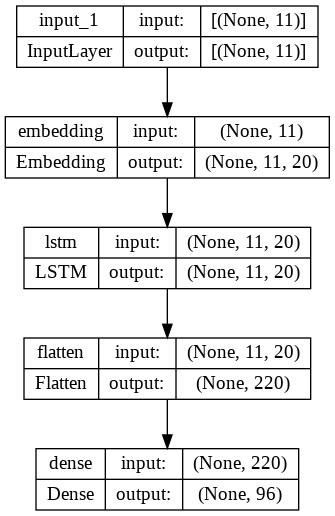

In [ ]:
# Visualization Plot Architecture Model (Visualisasi Plot Arsitektur Model)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## **Parameter Model**

In [ ]:
# Menampilkan Parameter Model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 embedding (Embedding)       (None, 11, 20)            5360      
                                                                 
 lstm (LSTM)                 (None, 11, 20)            3280      
                                                                 
 flatten (Flatten)           (None, 220)               0         
                                                                 
 dense (Dense)               (None, 96)                21216     
                                                                 
Total params: 29,856
Trainable params: 29,856
Non-trainable params: 0
_________________________________________________________________


## **Training Model**

Melatih model sampai 300 kali agar mendapat akurasi yang tinggi

In [ ]:
# Training model (Latih data model sampai 300 kal i)  
train = model.fit  (  x_train  ,   y_train  ,   epochs=  300 )

Epoch 1/300
34/34 [==============================] - 3s 7ms/step - loss: 4.5510 - accuracy: 0.0141
Epoch 2/300
34/34 [==============================] - 0s 7ms/step - loss: 4.4527 - accuracy: 0.0320
Epoch 3/300
34/34 [==============================] - 0s 7ms/step - loss: 4.3779 - accuracy: 0.0320
Epoch 4/300
34/34 [==============================] - 0s 7ms/step - loss: 4.3147 - accuracy: 0.0405
Epoch 5/300
34/34 [==============================] - 0s 7ms/step - loss: 4.1778 - accuracy: 0.0423
Epoch 6/300
34/34 [==============================] - 0s 7ms/step - loss: 4.0093 - accuracy: 0.0499
Epoch 7/300
34/34 [==============================] - 0s 7ms/step - loss: 3.8625 - accuracy: 0.0611
Epoch 8/300
34/34 [==============================] - 0s 7ms/step - loss: 3.7226 - accuracy: 0.0960
Epoch 9/300
34/34 [==============================] - 0s 7ms/step - loss: 3.5751 - accuracy: 0.1129
Epoch 10/300
34/34 [==============================] - 0s 7ms/step - loss: 3.4171 - accuracy: 0.1759
Epoch 11/

Setelah dilakukan training model, hasil akurasi nya mendapatkan 0.9915 atau sebesar 99% dengan loss 0.0120

## **Model Analysis**

Menampilkan hasil akurasi dari training model sebelumnya dan diimplementasikan kedalam sebuah plot

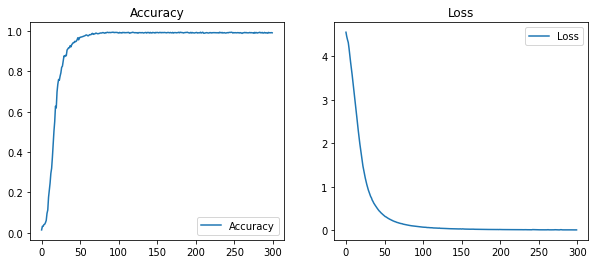

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'],label='Accuracy')
#plt.plot(train.history['val_accuracy'],label='Testing Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(train.history['loss'],label='Loss')
#plt.plot(train.history['val_loss'],label='Testing Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

## **Testing Chatbot**

Setelah mengetahui hasil dari akurasi dan loss pada model yang telah ditetapkan dengan algoritma Neural Network dan LSTM. Maka, tahapan selanjutnya adalah menguji atau testing pada chatbot yang telah dilatih sebelumnya dan melihat apakah sesuai atau tidak pada saat kita masukan teks kalimat pertanyaannya.

Pada pengujian ini menggunakan metode input atau masukan sesuai dengan kalimat pertanyaan yang dimasukkan.

In [ ]:
# Membuat Input Chat
while True:
  texts_p = []
  prediction_input = input('👩🏻/🧑🏻Kamu : ')
  
  # Menghapus punktuasi dan konversi ke huruf kecil
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  # Tokenisasi dan Padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  # Mendapatkan hasil keluaran pada model 
  output = model.predict(prediction_input)
  output = output.argmax()

  # Menemukan respon sesuai data tag
  response_tag = le.inverse_transform([output])[0]
  print("🤖 Aghaskin : ", random.choice(responses[response_tag]))

  # Tambahkan respon 'bye' agar bot bisa berhenti
  if response_tag == "goodbye":
    break


👩🏻/🧑🏻Kamu : hai
1/1 [==============================] - 0s 484ms/step
🤖 Aghaskin :  Helo! Ini Aghaskin. Kulit wajah kamu lagi bermasalah ya? Jangan khawatir ya, Aghaskin akan membantu kamu
👩🏻/🧑🏻Kamu : kamu siapa
1/1 [==============================] - 0s 21ms/step
🤖 Aghaskin :  Hai, ini Aghaskin. Aghaskin adalah penyelamat disaat kamu mempunyai masalah seputar kulit wajah kamu. Jangan khawatir ya, aku pasti bantu kamu!
👩🏻/🧑🏻Kamu : aghaskin itu apa
1/1 [==============================] - 0s 17ms/step
🤖 Aghaskin :  Hai, ini Aghaskin. Aghaskin adalah penyelamat disaat kamu mempunyai masalah seputar kulit wajah kamu. Jangan khawatir ya, aku pasti bantu kamu!
👩🏻/🧑🏻Kamu : bantu aku dong
1/1 [==============================] - 0s 18ms/step
🤖 Aghaskin :  Hai, jangan khawatir ya, aku pasti bantu kamu.Kamu lagi kenapa nih?
👩🏻/🧑🏻Kamu : lagi sedih
1/1 [==============================] - 0s 84ms/step
🤖 Aghaskin :  Apa yang bisa Aghaskin lakukan untuk kamu?
👩🏻/🧑🏻Kamu : aku jerawatan
1/1 [================

##**Save the Model**

Setelah pengujian Chatbot telah disesuaikan dengan kalimat dan jawabannya. Maka, model chatbot bisa disimpan dengan format .h5 atau .pkl (pickle) untuk penggunaan aplikasi AI Chatbot dengan website atau sistem Android. Penyimpanan file model bisa langsung secara transient atau bisa taruh di Google Drive.

In [ ]:
# Simpan model dalam bentuk format file .h5 atau .pkl (pickle)
model.save('chat_model.h5')

print('Model Created Successfully!')

Model Created Successfully!
